# Week 3 Peer Graded Assignment - Segmenting and Clustering toronto_merged in Toronto

## 1. Scraping the wikipedia page and transforming the data

Import the needed libraries

In [149]:
import pandas as pd
import requests
#from bs4 import BeautifulSoup

Scrape the postal code table using pandas. The first item in the object is read into the dataframe, which is the table itself from wiki.

In [150]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


First we remove the rows where Not Assigned value is in the Borough column.

In [151]:
to_drop = ['Not assigned']

In [152]:
df2 = df[~df['Borough'].isin(to_drop)] #df2 is df where the isin() check is false
df2 = df2.reset_index(drop = True)
df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Check if any Neighbourhoods have Not assigned value after.

In [153]:
df2.loc[df2["Neighbourhood"] == "Not assigned"]

,Postal Code,Borough,Neighbourhood


There are no such rows currently. They may be added in the future, so as a safety measure we change Not assigned Neighbourhood values to the value of Borough.

In [154]:
df2.loc[df2["Neighbourhood"] == "Not assigned", "Neighbourhood"] = df2.loc[df2["Neighbourhood"] == "Not assigned","Borough"]
df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Now that we ensured that there are no Not assigned values in the data frame, we can group the rows based on Postal Code. This is another safety measure as at the time of writing this, the wikipedia page already grouped the rows.

In [155]:
toronto = df2.groupby(['Postal Code', 'Borough']).agg(lambda col: ','.join(col)).reset_index()
toronto

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


The shape of the resulting dataframe:

In [156]:
toronto.shape

(103, 3)

## 2. Getting the coordinates of postal codes

Since I couldn't get geocoder to work, I'll use the .csv option

In [7]:
!wget -O coordinates.csv https://cocl.us/Geospatial_data

--2020-10-23 16:06:51--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.63.96.148, 169.63.96.51
Connecting to cocl.us (cocl.us)|169.63.96.148|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-10-23 16:06:52--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-10-23 16:06:52--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]

The file is downloaded, let's load it into a dataframe.

In [157]:
coordinates = pd.read_csv("coordinates.csv")
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Looks good, now let's add the coordinates to the toronto data frame by merging them (left on toronto).

In [158]:
toronto_merged = toronto.merge(coordinates, on="Postal Code")
toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [159]:
toronto_merged.tail()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437
102,M9W,Etobicoke,"Northwest, West Humber - Clairville",43.706748,-79.594054


Good!

## 3. Exploration and clustering

In [160]:
from geopy.geocoders import Nominatim
import folium
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

Find the coordinates of the city of Toronto

In [161]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


Create a map of Toronto with the postal codes

In [163]:
map_toronto_full = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postcode, borough, neighbourhood in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Borough'], toronto_merged['Neighbourhood']):
    label = '{} - {} - {}'.format(neighbourhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_full)  
    
map_toronto_full

Let's create a narrowed down subset of Boroughs, as the task suggested. Only those are included that have the word Toronto in the Borough name.

In [164]:
tor_bors = toronto_merged[toronto_merged["Borough"].str.contains("Toronto")]
tor_bors

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [165]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postcode, borough, neighbourhood in zip(tor_bors['Latitude'], tor_bors['Longitude'], tor_bors['Postal Code'], tor_bors['Borough'], tor_bors['Neighbourhood']):
    label = '{} - {} - {}'.format(neighbourhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Foursquare credentials and version

In [166]:
CLIENT_ID = 'XLWGBTZ20IZJHZWQ422OJSEJXVRIQWDFOBLGC4DYGMQ3RGK1' # your Foursquare ID
CLIENT_SECRET = 'IBBY41VCRFMHEM4GNNXDHVPRM3C431U0G3WSGJ3QYNKXQ4QY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XLWGBTZ20IZJHZWQ422OJSEJXVRIQWDFOBLGC4DYGMQ3RGK1
CLIENT_SECRET:IBBY41VCRFMHEM4GNNXDHVPRM3C431U0G3WSGJ3QYNKXQ4QY


Let's get the get_category_type function from the Foursquare lab

In [167]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Also get the function from the lab to get the venues per postal codes.

In [168]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [134]:
toronto_venues = getNearbyVenues(names=tor_bors['Postal Code'],
                                   latitudes=tor_bors['Latitude'],
                                   longitudes=tor_bors['Longitude']
                                  )

M4E
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6G
M6H
M6J
M6K
M6P
M6R
M6S
M7A
M7Y


In [169]:
toronto_venues.head()

,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,M4E,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,M4E,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,M4E,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,M4K,43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [170]:
toronto_venues.shape

(1624, 7)

We received 1624 venues from Forsquare. Let's see how their locations are distributed.

In [171]:
toronto_venues.groupby('Postal Code').count()

,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,
M4E,4,4,4,4,4,4
M4K,43,43,43,43,43,43
M4L,19,19,19,19,19,19
M4M,37,37,37,37,37,37
M4N,3,3,3,3,3,3
M4P,9,9,9,9,9,9
M4R,18,18,18,18,18,18
M4S,33,33,33,33,33,33
M4T,2,2,2,2,2,2


In [172]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 237 uniques categories.


In [173]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Postal Code'] = toronto_venues['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()



,Postal Code,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M4E,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()
toronto_grouped

,Postal Code,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M4E,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,M4K,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.023256,0.000000,...,0.000000,0.000000,0.023256,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.023256
2,M4L,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,M4M,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.054054,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.027027,0.00,0.027027
4,M4N,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,M4P,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,M4R,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.055556
7,M4S,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.030303,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,M4T,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,M4V,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.071429,0.000000,0.00,0.000000


Let's find the top 5 categories in the neighbourhoods.

In [175]:
num_top_venues = 5

for hood in toronto_grouped['Postal Code']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Postal Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
                venue  freq
0               Trail  0.25
1   Health Food Store  0.25
2        Neighborhood  0.25
3                 Pub  0.25
4  Mexican Restaurant  0.00


----M4K----
                    venue  freq
0        Greek Restaurant  0.16
1             Coffee Shop  0.09
2      Italian Restaurant  0.07
3  Furniture / Home Store  0.05
4               Bookstore  0.05


----M4L----
                  venue  freq
0                  Park  0.11
1           Coffee Shop  0.05
2               Brewery  0.05
3  Fast Food Restaurant  0.05
4     Fish & Chips Shop  0.05


----M4M----
                 venue  freq
0          Coffee Shop  0.08
1              Brewery  0.05
2                 Café  0.05
3  American Restaurant  0.05
4               Bakery  0.05


----M4N----
                 venue  freq
0                 Park  0.33
1             Bus Line  0.33
2          Swim School  0.33
3    Afghan Restaurant  0.00
4  Monument / Landmark  0.00


----M4P----
                  venue  freq


In [176]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [177]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postal Code'] = toronto_grouped['Postal Code']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Pub,Health Food Store,Trail,Neighborhood,Yoga Studio,Distribution Center,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
1,M4K,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Ice Cream Shop,Furniture / Home Store,Bookstore,Juice Bar,Spa,Pub
2,M4L,Park,Sushi Restaurant,Fish & Chips Shop,Steakhouse,Pub,Brewery,Fast Food Restaurant,Italian Restaurant,Restaurant,Pizza Place
3,M4M,Coffee Shop,American Restaurant,Bakery,Brewery,Café,Gastropub,Yoga Studio,Fish Market,Park,Neighborhood
4,M4N,Park,Bus Line,Swim School,Dim Sum Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


## Clustering

Let's find the optimal k value for the clustering.

In [178]:
toronto_grouped_clustering = toronto_grouped.drop('Postal Code', 1)

Let's take a look at max 10.

In [179]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

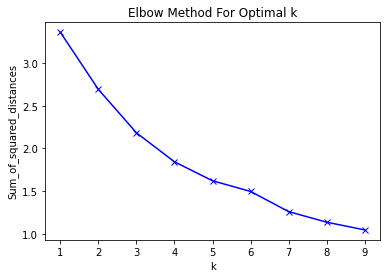

In [180]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


I see a vague elbow point, let's increase the max number and plot it again.

In [181]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

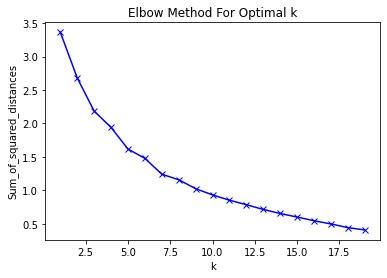

In [182]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

I may be wrong but 6 seems to be the elbow point, so let's go with 6.

In [196]:
kclusters = 6

In [197]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [198]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

Now let's add the cluster labels and the categories to the Neighbourhood dataframe.

In [199]:
final_df = tor_bors.merge(neighborhoods_venues_sorted.set_index('Postal Code'), on='Postal Code')

In [200]:
final_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Health Food Store,Trail,Neighborhood,Yoga Studio,Distribution Center,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Ice Cream Shop,Furniture / Home Store,Bookstore,Juice Bar,Spa,Pub
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Park,Sushi Restaurant,Fish & Chips Shop,Steakhouse,Pub,Brewery,Fast Food Restaurant,Italian Restaurant,Restaurant,Pizza Place
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,American Restaurant,Bakery,Brewery,Café,Gastropub,Yoga Studio,Fish Market,Park,Neighborhood
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Park,Bus Line,Swim School,Dim Sum Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [201]:
final_df.groupby("Cluster Labels").count()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,
0,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


We can see that most of the rows were put in one cluster. Let's throw this on the map.

In [202]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_df['Latitude'], final_df['Longitude'], final_df['Postal Code'], final_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Again, most of Boroughs were organised into one cluster. We can take a look at the content of each cluster and compare them to cluster 2, find the differences.

Cluster 0

In [204]:
final_df.loc[final_df['Cluster Labels'] == 0]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Health Food Store,Trail,Neighborhood,Yoga Studio,Distribution Center,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Ice Cream Shop,Furniture / Home Store,Bookstore,Juice Bar,Spa,Pub
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Park,Sushi Restaurant,Fish & Chips Shop,Steakhouse,Pub,Brewery,Fast Food Restaurant,Italian Restaurant,Restaurant,Pizza Place
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,American Restaurant,Bakery,Brewery,Café,Gastropub,Yoga Studio,Fish Market,Park,Neighborhood
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Gym / Fitness Center,Sandwich Place,Park,Department Store,Breakfast Spot,Dance Studio,Hotel,Dog Run,Food & Drink Shop,Distribution Center
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Coffee Shop,Clothing Store,Yoga Studio,Bagel Shop,Furniture / Home Store,Ice Cream Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Chinese Restaurant
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Sandwich Place,Dessert Shop,Pizza Place,Café,Italian Restaurant,Gym,Coffee Shop,Sushi Restaurant,Pharmacy,Indian Restaurant
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Coffee Shop,Pizza Place,Light Rail Station,Liquor Store,Restaurant,Bank,Bagel Shop,Pub,Supermarket,Fried Chicken Joint
11,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,0,Coffee Shop,Restaurant,Pizza Place,Café,Italian Restaurant,Chinese Restaurant,Park,Market,Bakery,Pub
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Yoga Studio


Cluster 1

In [205]:
final_df.loc[final_df['Cluster Labels'] == 1]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936,1,Music Venue,Garden,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


Cluster 2

In [206]:
final_df.loc[final_df['Cluster Labels'] == 2]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M4N,Central Toronto,Lawrence Park,43.72802,-79.38879,2,Park,Bus Line,Swim School,Dim Sum Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


Cluster 3

In [207]:
final_df.loc[final_df['Cluster Labels'] == 3]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.38316,3,Playground,Trail,Yoga Studio,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


Cluster 4

In [208]:
final_df.loc[final_df['Cluster Labels'] == 4]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,4,Park,Playground,Trail,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
23,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,4,Park,Jewelry Store,Trail,Sushi Restaurant,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


Cluster 5

In [209]:
final_df.loc[final_df['Cluster Labels'] == 5]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,M6G,Downtown Toronto,Christie,43.669542,-79.422564,5,Grocery Store,Café,Park,Coffee Shop,Restaurant,Athletics & Sports,Italian Restaurant,Candy Store,Baby Store,Nightclub
